## As Covid-19 continues to impact the Economy it would be beneficial to understand where the bod market is heading in the near future. You have been hired as a consultant to forecast the Aaa Coroprate bond market 12 months into the future based on the data compiled from https://fred.stlouisfed.org/series/AAA

### Your goal is to use a Recurrent Network to make tour forecast. Remember your data is based on a monthly bases so so will you predicitions and Forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aaa = pd.read_csv("resources/AAA.csv", parse_dates = True, index_col="DATE")

## Initial observation
- Aaa coporate bonds have fallen in value in recent years
- Aaa 2020 is on track to being the lowest since 1944

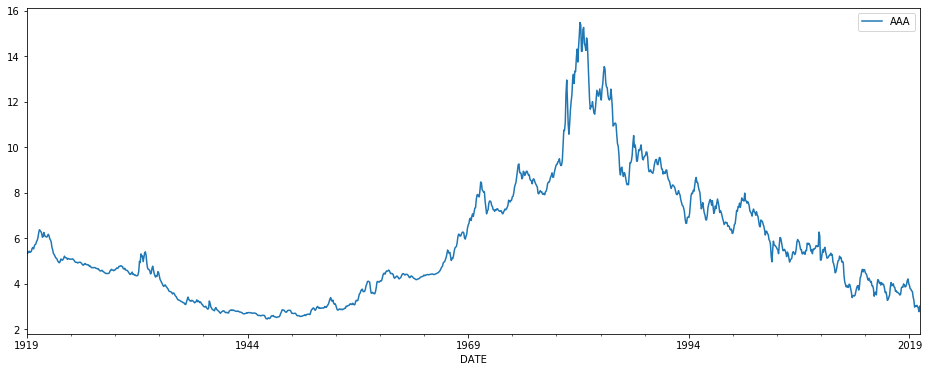

In [3]:
aaa.plot(figsize = (16,6))

# info 
- We have 1215 months in our data making the data a bit over 100 years
- we will take 12 years (144months) of data to use as our testing set

In [4]:
aaa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215 entries, 1919-01-01 to 2020-03-01
Data columns (total 1 columns):
AAA    1215 non-null float64
dtypes: float64(1)
memory usage: 19.0 KB


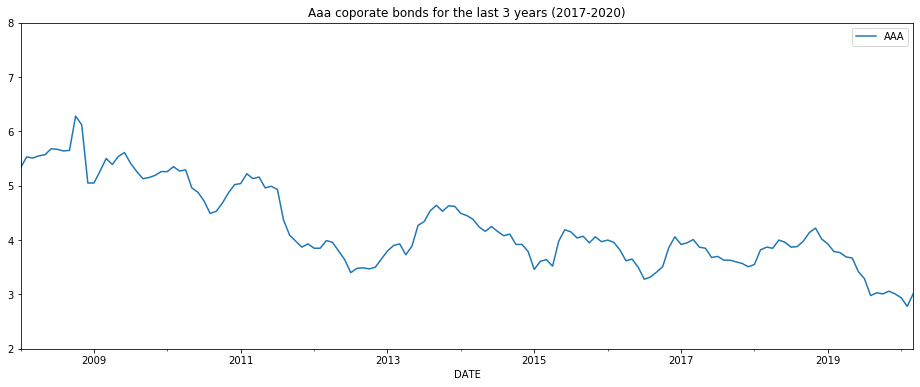

In [5]:
aaa.plot(figsize = (16,6))
plt.xlim("2008-1-1", "2020-03-1")
plt.ylim(2,8)
plt.title("Aaa coporate bonds for the last 3 years (2017-2020)");

### test index 

In [6]:
test_count = 144
test_index = len(aaa) - test_count

In [7]:
test_index

1071

In [8]:
len(aaa)

1215

In [9]:
train = aaa.iloc[:test_index]

In [10]:
test = aaa.iloc[test_index:]

### lets scale our data for traiing our model

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scalar = MinMaxScaler()

In [13]:
train_scaled = scalar.fit_transform(train)

In [14]:
test_scaled = scalar.transform(test)

### Create a generator to batch our data for our model

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
##length - > will be 2 years out of the 3 
length = 72
generator = TimeseriesGenerator(train_scaled,train_scaled, length=length, batch_size=1)

## testing the generator
- looks like out generator is set up properly to train out model on. Predicted y value correctly 

In [17]:
X,y = generator[0]

In [18]:
X

array([[[0.22179586],
        [0.22179586],
        [0.22486569],
        [0.22870299],
        [0.22486569],
        [0.22563315],
        [0.22870299],
        [0.23791251],
        [0.24098235],
        [0.23637759],
        [0.24558711],
        [0.25095932],
        [0.25249424],
        [0.2609363 ],
        [0.26554106],
        [0.27475058],
        [0.29086723],
        [0.30084421],
        [0.29777437],
        [0.29470453],
        [0.28856485],
        [0.27551804],
        [0.27782041],
        [0.29163469],
        [0.28242517],
        [0.27782041],
        [0.27782041],
        [0.2762855 ],
        [0.28012279],
        [0.28549501],
        [0.28089025],
        [0.27091328],
        [0.26630852],
        [0.25940138],
        [0.24098235],
        [0.23330775],
        [0.2210284 ],
        [0.2171911 ],
        [0.21258634],
        [0.20644666],
        [0.20491174],
        [0.20107444],
        [0.19493477],
        [0.19186493],
        [0.18956255],
        [0

In [19]:
y

array([[0.19109747]])

In [20]:
train_scaled[72]

array([0.19109747])

### Validaiton generator
- Need to validate our data against something

In [21]:
valid_gen = TimeseriesGenerator(test_scaled,test_scaled, length=length, batch_size=1)

### Early Stopping 
- Will stop our training before the model overfits with training where the model produces the lowest error during epochs

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [23]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=2)

### Tensor Board 
- will provide a visual of out model training and architecture

In [24]:
log_dir = "resources/board/logs/fit"

board = TensorBoard( log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None,)

## model Creation
- We are now at a good point to begin training our model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

#### n_features = 1
#### model = Sequential()
#### model.add(LSTM(units = 100, activation= "relu", input_shape = (length, n_features)))
##### model.add(Dense(1))
#### model.compile(optimization = "adam", loss = "mse")

## fitting model
- Model above has been saved and will be imported

####### model.fit_generator(generator=generator, validation_data=valid_gen, epochs=20, callbacks=[stop, board])

In [27]:
from tensorflow.keras.models import load_model

In [28]:
model = load_model("models/Aaa+phase2.h5")

## Model performance

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### Looks like our model performed Pretty Well
- Lets make a few predicitons making using the model

## predictions

In [32]:
n_features = 1
test_predicitons = []
batch = train_scaled[-length:]
current_batch = batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_prediciton = model.predict(current_batch)[0]
    test_predicitons.append(current_prediciton)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediciton]], axis = 1)

In [33]:
test_predicitons

[array([0.23847184], dtype=float32),
 array([0.24204102], dtype=float32),
 array([0.2455172], dtype=float32),
 array([0.24891259], dtype=float32),
 array([0.25225395], dtype=float32),
 array([0.25556162], dtype=float32),
 array([0.25884736], dtype=float32),
 array([0.26211625], dtype=float32),
 array([0.2653693], dtype=float32),
 array([0.26860553], dtype=float32),
 array([0.2718234], dtype=float32),
 array([0.27502143], dtype=float32),
 array([0.27819845], dtype=float32),
 array([0.2813715], dtype=float32),
 array([0.2846039], dtype=float32),
 array([0.2878818], dtype=float32),
 array([0.29118663], dtype=float32),
 array([0.29450047], dtype=float32),
 array([0.29780787], dtype=float32),
 array([0.30109626], dtype=float32),
 array([0.3043559], dtype=float32),
 array([0.30757946], dtype=float32),
 array([0.31076163], dtype=float32),
 array([0.31389868], dtype=float32),
 array([0.31698793], dtype=float32),
 array([0.3200277], dtype=float32),
 array([0.32301694], dtype=float32),
 array([0

## inverse _Scale
- Our data was trained  on scaled data so we need ot inverse the process 

In [34]:
true_predicitons = scalar.inverse_transform(test_predicitons)

In [35]:
true_predicitons

array([[5.56728802],
       [5.61379451],
       [5.65908904],
       [5.70333102],
       [5.74686896],
       [5.78996791],
       [5.83278105],
       [5.87537478],
       [5.91776193],
       [5.95993006],
       [6.00185898],
       [6.04352928],
       [6.08492581],
       [6.1262707 ],
       [6.16838874],
       [6.21109974],
       [6.2541618 ],
       [6.29734113],
       [6.34043658],
       [6.38328427],
       [6.42575724],
       [6.46776033],
       [6.50922405],
       [6.55009983],
       [6.59035275],
       [6.62996105],
       [6.66891075],
       [6.70719331],
       [6.7448064 ],
       [6.78174846],
       [6.8180226 ],
       [6.85363194],
       [6.88858112],
       [6.92287559],
       [6.95652156],
       [6.98952524],
       [7.02189362],
       [7.05363291],
       [7.08475089],
       [7.11525454],
       [7.14515085],
       [7.17444758],
       [7.20315251],
       [7.23127185],
       [7.25881413],
       [7.28578714],
       [7.31219862],
       [7.338

## Plotting Testing and Predictions

In [36]:
test["predictions"] = true_predicitons

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
test

,AAA,predictions
DATE,,
2008-04-01,5.55,5.567288
2008-05-01,5.57,5.613795
2008-06-01,5.68,5.659089
2008-07-01,5.67,5.703331
2008-08-01,5.64,5.746869
...,...,...
2019-11-01,3.06,8.291815
2019-12-01,3.01,8.294292
2020-01-01,2.94,8.296704


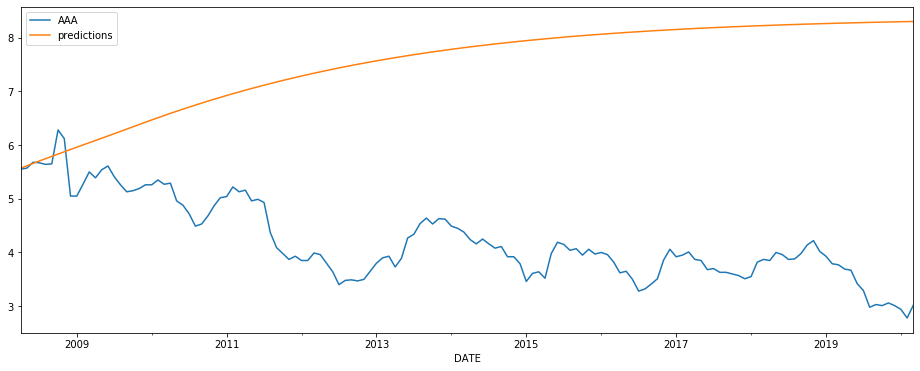

In [38]:
test.plot(figsize = (16,6))